In [4]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [5]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn import tree
import warnings
import sklearn
warnings.filterwarnings('ignore')

In [6]:
sklearn.__version__

'1.4.1.post1'

In [7]:
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

In [8]:
df = pd.read_csv("Crop_recommendation.csv")

In [9]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [10]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [11]:
df.size

17600

In [12]:
df.shape

(2200, 8)

In [13]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [14]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [15]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [16]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [17]:
df_new = df.copy()

In [18]:
df_new.drop('label',axis=1,inplace=True)

In [19]:
df_new

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


<AxesSubplot:>

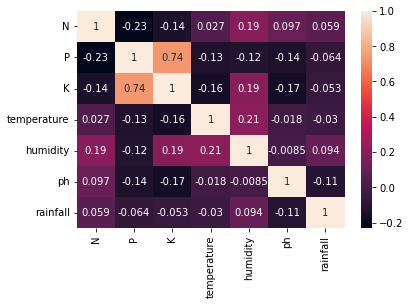

In [20]:
sns.heatmap(df_new.corr(),annot=True)

In [21]:
acc=[]
model =[]

# Decision Tree 

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
features = df[['N','P','K','temperature','humidity','ph','rainfall']]
target = df['label']
labels = df['label']
x_train , x_test , y_train , y_test = train_test_split(features,target,test_size=0.2,random_state=2)
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(x_train,y_train)
predicted_values = DecisionTree.predict(x_test)
x= metrics.accuracy_score(y_test,predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is : ",x*100)
print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is :  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00  

In [23]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTree,features,target,cv=5)

In [24]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

[[13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

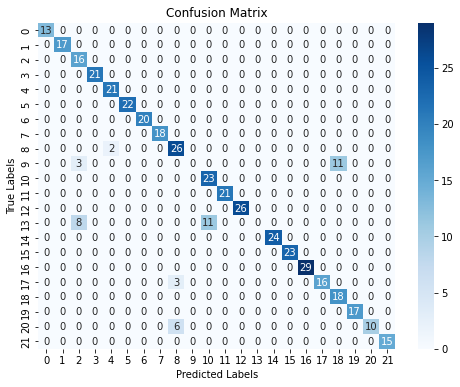

In [27]:
cm = confusion_matrix(y_test, predicted_values)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [22]:
# def recommendation(N,P,K,temperature,humidity,ph,rainfall):
#     features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
#     prediction = DecisionTree.predict(features).reshape(1,-1)
#     return prediction[0]

In [23]:
# N = 20
# P = 70
# K = 10
# temperature = 45
# humidity = 20
# ph = 7
# rainfall = 50
# predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)


In [24]:
# print(str(predict).replace("'","").replace('[','').replace(']',"") , "is best crop to be cultivated here")

In [25]:
import pickle
import sys
pickle.dump(DecisionTree, open('DecisionTree.pkl', 'wb'))
loadedmodel=pickle.load(open('DecisionTree.pkl','rb'))
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

In [26]:
loadedmodel
loadedmodel.predict([[40,50,45,25,64,54,96]])

array(['papaya'], dtype=object)

# Gaussian Naive Bayes

In [27]:
# from sklearn.naive_bayes import GaussianNB
# NaiveBayes = GaussianNB()
# NaiveBayes.fit(x_train,y_train)
# predicted_values = NaiveBayes.predict(x_test)
# x = metrics.accuracy_score(y_test,predicted_values)
# acc.append(x)
# model.append('Naive Bayes')
# print("Naive Bayes's Accuracy is : ",x)
# print(classification_report(y_test,predicted_values))

# Support Vector Machine


In [28]:
# from sklearn.svm import SVC
# SVM = SVC(gamma='auto')
# SVM.fit(x_train,y_train)
# predicted_values = SVM.predict(x_test)
# x = metrics.accuracy_score(y_test,predicted_values)
# acc.append(x)
# model.append('SVM')
# print("SVM's Accuracy is : ",x)
# print(classification_report(y_test,predicted_values))

# Logistic Regression

In [29]:
# from sklearn.linear_model import LogisticRegression
# LogReg = LogisticRegression(random_state=2)
# LogReg.fit(x_train,y_train)
# predicted_values = LogReg.predict(x_test)
# x = metrics.accuracy_score(y_test,predicted_values)
# acc.append(x)
# model.append('Logistic Regression')
# print("Logistic Regression's Accuracy is : ",x)
# print(classification_report(y_test,predicted_values))

# Random Forest

In [30]:
# from sklearn.ensemble import RandomForestClassifier
# RF = RandomForestClassifier(n_estimators=20,random_state=0)
# RF.fit(x_train,y_train)
# predicted_values = RF.predict(x_test)
# x=metrics.accuracy_score(y_test,predicted_values)
# acc.append(x)
# model.append('RF')
# print("RF's Accuracy is : ",x)
# print(classification_report(y_test,predicted_values))

In [31]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# XGBoost

In [52]:
# import xgboost as xgb
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit_transform(target)
# y_train_labelEncoded = le.transform(y_train)
# y_test_labelEncoded = le.transform(y_test)

# XB = xgb.XGBClassifier()
# XB.fit(x_train,y_train_labelEncoded)
# predicted_values = XB.predict(x_test)
# x = metrics.accuracy_score(y_test_labelEncoded,predicted_values)
# acc.append(x)
# model.append('XGBoost')
# print("XGBoost's Accuracy is : ",x)
# print(classification_report(y_test_labelEncoded,predicted_values))

XGBoost's Accuracy is :  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      0.96      0.95        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00     

ModuleNotFoundError: No module named 'python'